In [1]:
import pandas as pd
import numpy as np

<h1>Checking and handling missing values in the data</h1>

In [2]:
df = pd.read_csv('landslides.csv')
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [4]:
df.isna().sum() #numbers of missing values

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [6]:
df_null = df[df['date'].isnull()] # all nan dates
df_null

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
1482,7042,NaN,Morning,United States,Kansas,857,Mudslide,Downpour,0.0
1497,7080,NaN,13:00,United States,Ohio,4113,Landslide,Unknown,0.0
1526,7165,NaN,12:15,United States,Indiana,2085,Landslide,Rain,0.0


In [7]:
df = df[-df['date'].isnull()] #date without nulls
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [8]:
df['time'].value_counts()

Night            97
Morning          87
Afternoon        58
Early morning    36
3:00:00          12
                 ..
1:13              1
9:40:00           1
11:50:00          1
                  1
21:06             1
Name: time, Length: 159, dtype: int64

In [9]:
df['time'].isnull().sum()

1064

In [11]:
df['time'] = df['time'].fillna('Not Known') #fill na with Not Known
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [12]:
df['time'].isnull().sum()

0

In [13]:
mean_fatalities = df['fatalities'].mean()
mean_fatalities

1.4622314622314623

In [14]:
df['fatalities'] = df['fatalities'].fillna(mean_fatalities) # fill fatalities with the mean
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000


In [15]:
df['fatalities'].isnull().sum()

0

<h1>Date time parsing using .to_datetime()</h1>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1690 non-null   int64  
 1   date            1690 non-null   object 
 2   time            1690 non-null   object 
 3   country_name    1690 non-null   object 
 4   state/province  1689 non-null   object 
 5   population      1690 non-null   int64  
 6   landslide_type  1689 non-null   object 
 7   trigger         1688 non-null   object 
 8   fatalities      1690 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 132.0+ KB


In [17]:
df['date']

0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1690, dtype: object

In [20]:
df['parsed_date'] = pd.to_datetime(df['date'],format = '%m/%d/%y') # create a new column datetime
df['parsed_date']

0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: parsed_date, Length: 1690, dtype: datetime64[ns]

In [21]:
month_of_landslides = df['parsed_date'].dt.month #extract month from parsed date
month_of_landslides

0        3
1        3
2        4
3        4
4        4
        ..
1688    12
1689     2
1690     2
1691     2
1692     3
Name: parsed_date, Length: 1690, dtype: int64

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='parsed_date', ylabel='Count'>

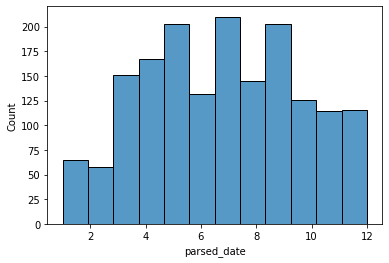

In [26]:
month_of_landslides = month_of_landslides.dropna() #drop na
sns.histplot(month_of_landslides, kde = False, bins = 12) #parsed_date = months
# it shows the distribuition of numbers of landslides across months of year

<h1>Correcting the data format</h1>

In [27]:
df['time'].value_counts()

Not Known        1064
Night              97
Morning            87
Afternoon          58
Early morning      36
                 ... 
1:13                1
9:40:00             1
11:50:00            1
                    1
21:06               1
Name: time, Length: 160, dtype: int64

In [43]:
def format_time(x): # function to format hours with ':'
    if ':' in x.lower(): # if there is ':'
            if int(x.split(':')[0]) >= 12 and int(x.split(':')[0]) < 18: #split by ':' and get the first element to get the hour
                x = 'Afternoon'
            elif int(x.split(':')[0]) < 12:
                x = 'Morning'
            elif int(x.split(':')[0]) >= 18:
                x = 'Night'
    elif 'evening' in x.lower(): #other cases
        x = "Evening"
    elif 'morning' in x.lower() or 'dawn' in x.lower():
        x = "Morning"
    elif 'afternoon' in x.lower():
        x = "Afternoon"
    elif 'night' in x.lower():
        x = "Night"
    else:
        x = "Not Known!"
        
    return x


In [44]:
df['time'] = df['time'].apply(format_time)

In [45]:
df['time'].value_counts()

Not Known!    1067
Morning        265
Night          194
Afternoon      145
Evening         19
Name: time, dtype: int64